In [7]:
import random
import math
import pandas as pd
from sympy import primerange


In [9]:
def generate_exponent_vectors(n_vectors, vector_len, exponent_range=(0, 4)):
    vectors = []
    for _ in range(n_vectors):
        vector = [random.randint(*exponent_range) for _ in range(vector_len)]
        vectors.append(vector)
    return vectors

def vector_to_integer(vector, primes):
    result = 1
    for exponent, prime in zip(vector, primes):
        if exponent != 0:
            result *= prime ** exponent
    return result

def build_dataset(n_vectors=1000, vector_len=50, exponent_range=(0, 4), include_log=True):
    primes = list(primerange(0, 1000))[:vector_len]
    vectors = generate_exponent_vectors(n_vectors, vector_len, exponent_range)

    rows = []
    for vec in vectors:
        n = vector_to_integer(vec, primes)
        row = vec + [n]
        if include_log:
            row.append(math.log(n))
        rows.append(row)

    columns = [f"e{i}" for i in range(vector_len)] + ["integer"]
    if include_log:
        columns.append("log_integer")

    df = pd.DataFrame(rows, columns=columns)
    return df

# Adjust the dataset size and range
n_vectors = 5000
vector_len = 50
exponent_range = (0, 4)

# Build the dataset
df = build_dataset(n_vectors, vector_len, exponent_range, include_log=True)
df.head()


,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e42,e43,e44,e45,e46,e47,e48,e49,integer,log_integer
0,1,0,0,1,0,2,3,0,0,4,...,0,4,4,0,0,4,3,4,8589166514947611412816377907849854651078739604...,448.852010
1,3,4,2,4,2,0,3,0,0,2,...,0,1,0,3,1,4,3,2,1904612167355784301832824375696105218063354648...,412.807010
2,3,4,3,3,1,4,0,0,3,2,...,2,1,1,3,4,4,2,1,6116043932951435027909852094134890525986125010...,483.051200
3,0,2,2,2,4,4,0,3,1,1,...,1,2,3,3,2,4,4,1,1308839492205756159555290445116798089379976127...,389.406022
4,0,4,1,0,1,4,0,1,4,2,...,3,0,2,1,2,1,0,0,2622885573510356974742817620930005478022352491...,410.824422


In [6]:
# Customize the dataset size and range here
n_vectors = 5000
vector_len = 50
exponent_range = (0, 4)

# Build the dataset
df = build_dataset(n_vectors, vector_len, exponent_range, include_log=True)
df.head()


,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e42,e43,e44,e45,e46,e47,e48,e49,integer,log_integer
0,0,4,2,2,1,1,0,1,2,1,...,0,0,4,1,1,1,0,2,1334293993754244237914801235838452661115369047...,375.609772
1,2,4,0,0,1,2,0,4,0,3,...,2,0,2,1,1,1,1,3,3594655179403018628885998736194101473663523195...,339.759457
2,1,1,0,0,1,4,2,4,2,0,...,4,2,3,4,2,4,3,0,1028901819526017672241536577491951006573496116...,478.966191
3,4,0,2,1,1,0,1,0,2,1,...,1,4,0,1,1,1,1,2,4593454237727214546518752165241945277689569918...,395.266683
4,0,3,4,2,0,2,0,1,0,1,...,1,0,3,2,0,1,2,4,4833710362604610384437010923738843349472238186...,383.804740


In [10]:
df.to_csv("prime_exponent_dataset.csv", index=False)
print("Dataset saved to prime_exponent_dataset.csv")


Dataset saved to prime_exponent_dataset.csv


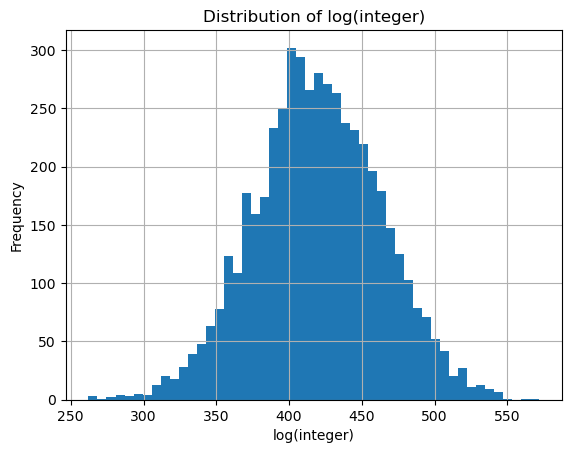

In [12]:
import matplotlib.pyplot as plt

plt.hist(df["log_integer"], bins=50)
plt.title("Distribution of log(integer)")
plt.xlabel("log(integer)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [13]:
# Count how many integers are repeated in the dataset
n_unique = df["integer"].nunique()
n_total = len(df)

print(f"Unique integers: {n_unique} out of {n_total}")
print(f"Number of repeated integers: {n_total - n_unique}")


Unique integers: 5000 out of 5000
Number of repeated integers: 0


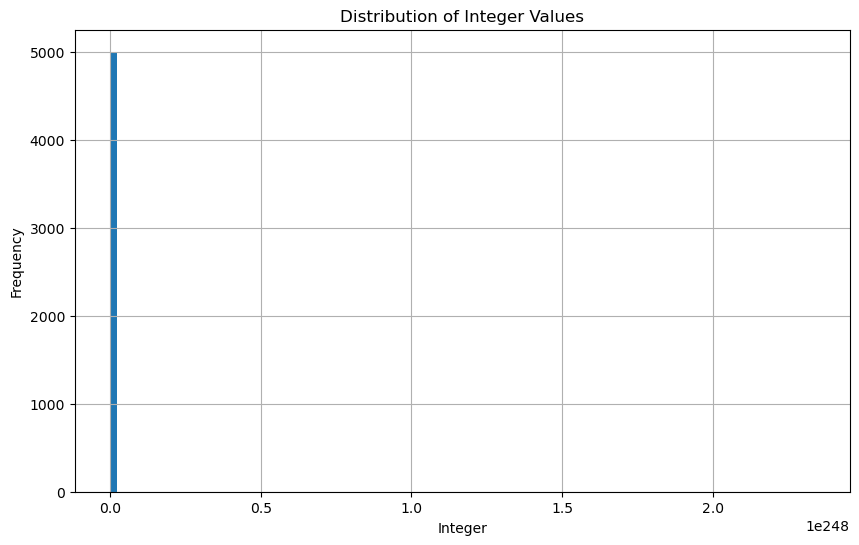

In [15]:
import matplotlib.pyplot as plt
df["integer"] = pd.to_numeric(df["integer"])

plt.figure(figsize=(10, 6))
plt.hist(df["integer"], bins=100)
plt.title("Distribution of Integer Values")
plt.xlabel("Integer")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
